# MEERKOSOFT
### BDA Team Project: *Predictive Analysis (SVM Classification Model)*


### IMPORT DATASET

In [1]:
import pandas as pd
rawdata = pd.read_excel("./D1_Water Source Consumability.xlsx")
rawdata.shape


(3276, 10)

The data is exported from the Excel sheet and the shape of it before preparation is **3,276 rows** and **10 columns**.

### DESCRIBE DATA & DATA CLEANSING

In [2]:
# check for missing values
rawdata.isna().sum()

ph          491
hardness      0
tds           0
cl            0
thm         162
sulfate     781
conduct       0
carbon        0
turbid        0
consume       0
dtype: int64

Findings show that there are **three columns** with **multiple missing values**. Below is a summary of missing values along with proposed solution on how to resolve the problem for each column. The columns are sorted by the method that will be used.

|Column      |Number of missing values| Method to clean| 
| - | - |-|
|sulfate     |781|Remove Row|
|ph          |491|Average filling|
|thm         |162|Backwards filling|



In [3]:
#Remove Rows
rawdata = rawdata[rawdata['sulfate'].notna()]

#Average filling
rawdata['ph'].fillna(value=rawdata['ph'].mean(), inplace=True)

#Backwards filling
rawdata.loc[:,'thm'] = rawdata.loc[:,'thm'].bfill()

rawdata.isna().sum()

ph          0
hardness    0
tds         0
cl          0
thm         0
sulfate     0
conduct     0
carbon      0
turbid      0
consume     0
dtype: int64

As shown by the output, the dataset has now been cleaned up from all NAN vlaues.

In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495 entries, 1 to 3275
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ph        2495 non-null   float64
 1   hardness  2495 non-null   float64
 2   tds       2495 non-null   float64
 3   cl        2495 non-null   float64
 4   thm       2495 non-null   float64
 5   sulfate   2495 non-null   float64
 6   conduct   2495 non-null   float64
 7   carbon    2495 non-null   float64
 8   turbid    2495 non-null   float64
 9   consume   2495 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 214.4 KB


The dataset appears to be fully numerical as float, except for the `consume` column. The column appears to be an integer storing a boolean value in the form of integers of 1 or 0 to indicate a true or false value.

In [5]:
rawdata.describe()

,ph,hardness,tds,cl,thm,sulfate,conduct,carbon,turbid,consume
count,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000
mean,7.083824,196.213489,22065.860761,7.119219,66.182244,333.775777,425.529584,14.328318,3.967982,0.394790
std,1.460755,32.689075,8763.541797,1.584166,16.097947,41.416840,80.774995,3.308675,0.782624,0.488903
min,0.227499,47.432000,320.942611,0.352000,8.577013,129.000000,201.619737,2.200000,1.450000,0.000000
25%,6.284685,176.855409,15623.966290,6.121563,55.463155,307.699498,365.210558,12.084461,3.435883,0.000000
50%,7.083824,197.142637,21043.626930,7.135063,66.359658,333.073546,421.625238,14.254641,3.965647,0.000000
75%,7.859798,216.421982,27372.857060,8.106435,77.108846,359.950170,481.037109,16.620006,4.506183,1.000000
max,14.000000,317.338124,61227.196010,13.127000,124.000000,481.030642,753.342620,27.006707,6.739000,1.000000


A summary of each column is shown above representing the `min` and `max` value of each column from the dataset. The `mean`, `standard deviation` and `IQR` is also shown.

Next, we will eliminate any rows for all columns (except `consume`) that exceed the **3 standard deviation value** to remove outlier values.

C:\Users\vEonz\AppData\Local\Temp/ipykernel_338376/2132553032.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_outliers = no_outliers[abs(stats.zscore(rawdata[c]) < 3)]


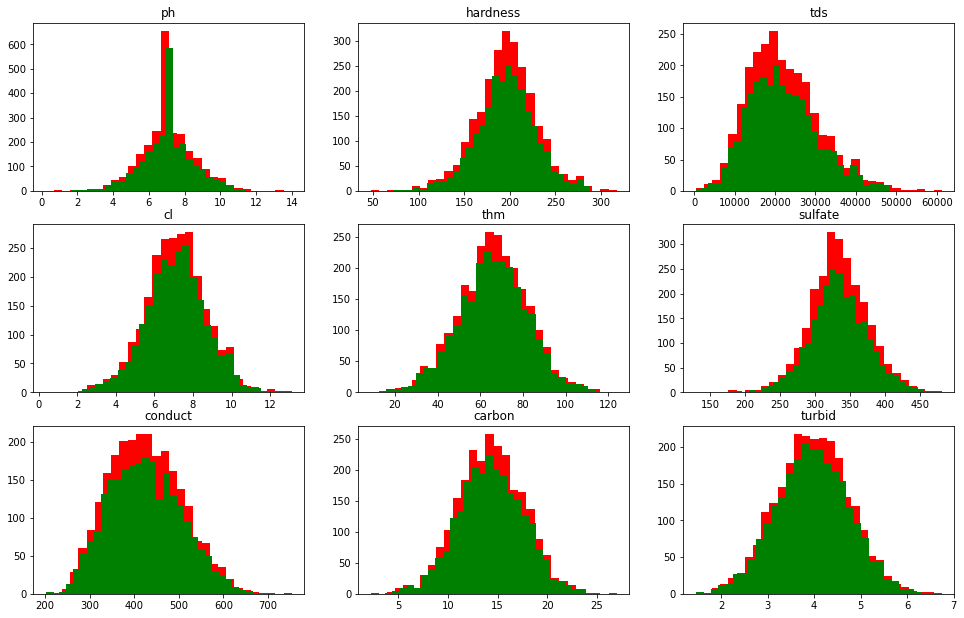

Removed 60 rows.


In [6]:
from scipy import stats
import matplotlib.pyplot as plt
numeric_columns= rawdata.loc[:, :'turbid']

outlier_columns = list(numeric_columns.columns)

no_outliers = rawdata

for c in outlier_columns:
    no_outliers = no_outliers[abs(stats.zscore(rawdata[c]) < 3)]

no_outliers.reset_index(drop=True, inplace=True)  # reset index

# Plot pruned columns (red) vs kept columns (green)
fig, axs = plt.subplots(3, 3)

for indx, ax in enumerate(axs.flat):
    ax.hist(rawdata.iloc[:, [indx]], color = 'red', bins = 30)
    ax.hist(no_outliers.iloc[:, [indx]], color = 'green', bins = 30)
    ax.set_title(rawdata.columns[indx])
fig.set_size_inches(16.5, 10.5)
plt.show()

print(f'Removed {rawdata.shape[0] - no_outliers.shape[0]} rows.')

rawdata = no_outliers

This shows that only **60 rows** has been removed in total across all columns.

Furthermore, all rows with outliers outside the `IQR` for each column will also be dropped. Below, we will draw a visualization of the outliers for each column using box plots.

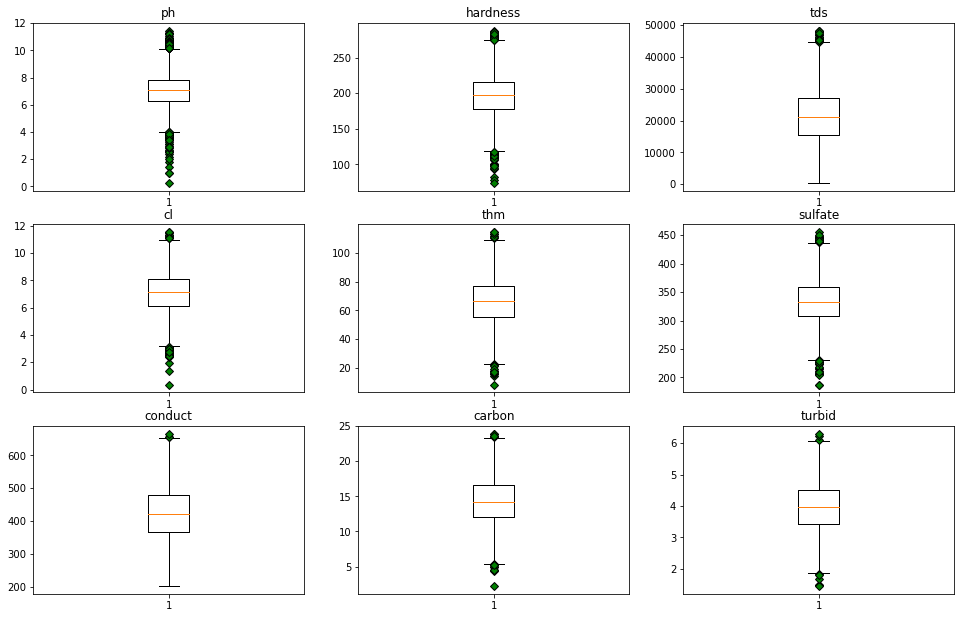

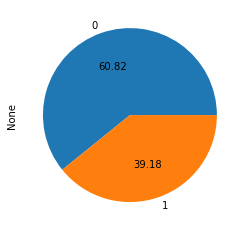

In [7]:
from matplotlib.pyplot import figure
fig, axs = plt.subplots(3, 3)

for indx, ax in enumerate(axs.flat):
    # rawdata.groupby(c).size().plot(kind='pie', autopct='%.2f')
    ax.boxplot(rawdata.iloc[:, [indx]], flierprops=dict(markerfacecolor='g', marker='D'))
    ax.set_title(rawdata.columns[indx])
fig.set_size_inches(16.5, 10.5)
plt.show()

rawdata.groupby('consume').size().plot(kind='pie', autopct='%.2f')
plt.show()

Counting outliers outside of the `IQR` range for each column.

In [8]:
Q1 = rawdata.quantile(0.25)
Q3 = rawdata.quantile(0.75)
IQR = Q3 - Q1
((rawdata < (Q1 - 1.5 * IQR)) | (rawdata > (Q3 + 1.5 * IQR))).sum()

ph          108
hardness     60
tds          21
cl           33
thm          19
sulfate      34
conduct       3
carbon       16
turbid        9
consume       0
dtype: int64

|Column|Number of outliers outside IQR|
|-|-|
|ph       |  108|
|hardness |   60|
|tds      |   21|
|cl       |   33|
|thm      |   19|
|sulfate  |   34|
|conduct  |    3|
|carbon   |   16|
|turbid   |    9|
|consume  |    0|


The output above shows the number of rows that fall outside the interquartile range for each column. These outliers will be **omitted**.

We can clearly see that no outliers are present in the `consume` column.

Now we will proceed to cleaning the `IQR` outliers

In [9]:
import numpy as np
mask = ((rawdata < (Q1 - 1.5 * IQR)) | (rawdata > (Q3 + 1.5 * IQR)))
rawdata[mask] = np.nan
before = rawdata.shape[0]
rawdata.dropna(inplace=True)
after = rawdata.shape[0]
print(((rawdata < (Q1 - 1.5 * IQR)) | (rawdata > (Q3 + 1.5 * IQR))).sum())
print(f"Rows removed: {before-after}")

ph          0
hardness    0
tds         0
cl          0
thm         0
sulfate     0
conduct     0
carbon      0
turbid      0
consume     0
dtype: int64
Rows removed: 271


There are no missing values now.<br>
All **271 rows** of outliers outside the interquartile range have been removed.


Next, we reset the indexes of the dataset in order to measure coorelation and prepare it for feature scaling.

In [18]:
rawdata.reset_index(drop=True, inplace=True)
cleaned_dataset = rawdata
cleaned_dataset.shape

(2164, 10)

With a total of **1,112 rows** removed, the clean dataset now has **2,164 rows** with the original **10 columns**.<br>

We can now print the corrolation graph for this dataset to find any hidden relations between the columns.

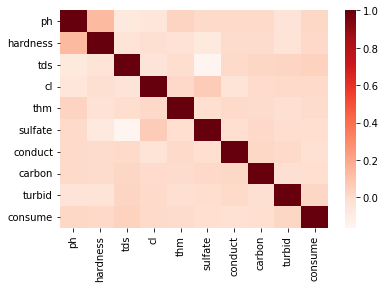

,ph,hardness,tds,cl,thm,sulfate,conduct,carbon,turbid,consume
ph,1.000000,0.130121,-0.078256,-0.056356,0.027318,0.006366,0.005481,0.006361,-0.041429,0.017083
hardness,0.130121,1.000000,-0.038098,-0.015829,-0.027428,-0.080384,-0.004527,-0.003838,-0.037710,0.011187
tds,-0.078256,-0.038098,1.000000,-0.044675,-0.008858,-0.163651,0.004842,0.019226,0.024851,0.038003
cl,-0.056356,-0.015829,-0.044675,1.000000,0.013256,0.059669,-0.036894,0.000305,0.007308,0.006693
thm,0.027318,-0.027428,-0.008858,0.013256,1.000000,-0.011620,0.005416,-0.002091,-0.015564,-0.001597
sulfate,0.006366,-0.080384,-0.163651,0.059669,-0.011620,1.000000,-0.010374,0.013458,-0.005839,-0.010943
conduct,0.005481,-0.004527,0.004842,-0.036894,0.005416,-0.010374,1.000000,0.015968,0.008611,-0.019838
carbon,0.006361,-0.003838,0.019226,0.000305,-0.002091,0.013458,0.015968,1.000000,-0.015406,-0.010328
turbid,-0.041429,-0.037710,0.024851,0.007308,-0.015564,-0.005839,0.008611,-0.015406,1.000000,0.021099
consume,0.017083,0.011187,0.038003,0.006693,-0.001597,-0.010943,-0.019838,-0.010328,0.021099,1.000000


In [19]:
import seaborn as sb
corr = cleaned_dataset.corr()
# plotting correlation heatmap
dataplot = sb.heatmap(corr, cmap= "Reds")
# displaying heatmap
plt.show()
corr


A corrolation matrix heatmap provides us crucial information on relations between the features we have from this dataset. <br>
The heatmap shows no prominent correaltion between any of the columns presented in our dataset.<br>
While the highest positive correlation recorded was between `ph` and `hardenss`, it is still at a low 0.13.<br>
The lowest correaltion recorded was between `sulfate` and `tds`, the coefficient for coorelation here was as low as -0.16.<br>
Relative to all the columns, a very slight positive corealtion can be noticed in `(cl - sulfate)` and `(tds - consume)`.<br>
Overall, this dataset does not hold any correlation that stands out from its features.

### Feature Scaling

There is currently no requirment to engineer new features from the dataset as there is sufficient numerical features already present.<br>
Therefore, feature engineering will be skipped. All continuous numeric features that exists will be scaled using Robust Scaling.<br>
This is done to bring all values down to as small a range as possible, which is preferable for SVM modelling.

In [20]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
scaled = cleaned_dataset
columns = list(numeric_columns)
for c in numeric_columns:
    scaled[c] = rb.fit_transform(scaled[[c]])

### BEGIN MODELLING

The code below splits the data to 30% testing and 70% training. The code runs the model with default hyperparameters and compares the predicted output to the test output from the split.

We will be using the features `ph`, `hardness`, `tds`, `cl`, `thm`, `sulfate`, `conduct`, `carbon`, and `turbid` as inputs to perform predective analytics on the water consumabilty (`consume`) value with SVM classification.

In [13]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

# separate target from rest of data set
consume = scaled['consume']
data = scaled.drop("consume", axis=1)

# split data and target into train and test
train_data, test_data, train_con, test_con = train_test_split(scaled, consume, test_size=0.3)  # 30:70 (test:train)

# train model
clf = svm.SVC(kernel='sigmoid')
clf.fit(train_data, train_con)

output = pd.DataFrame(columns= ['Test Data','Predected Data'])
output['Test Data'] = test_con

# prediction & evaluation
y_pred = clf.predict(test_data)
y_pred = pd.Series(y_pred,index=output.index)


# output.reset_index(drop=True, inplace=True)
output['Predected Data'] = y_pred

accuracy, precision, recall = metrics.accuracy_score(test_con, y_pred), metrics.precision_score(test_con, y_pred), metrics.recall_score(test_con, y_pred)

model_acc = pd.DataFrame(columns=['accuracy', 'precision', 'recall'])
d = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
}
model_acc.at[0,:] = d
   
model_acc

,accuracy,precision,recall
0,0.987692,0.991489,0.974895


Because we have used 10 features for our predictive analysis, it is not possible to plot a **decsision boundry** for this SVM output in our case,<br>
as it will require a **10th dimension** graph which is not comprehensive. Instead, we printed the first 15 values predected alongside the actual test<br>
data to compare the results.

In [14]:
output.head(15)

,Test Data,Predected Data
511,1,1
1926,1,1
1824,1,1
65,1,1
353,0,0
980,1,1
1671,0,0
1031,0,0
2010,1,1
16,1,1


Using sigmoid SVM model, we are able to obtain an accuracy of above 97%. The accuracy achived from this predictive model surpasses our desirable threshold of model accuracy which was initially set at 95%. We can validate our model accuracy by running multiple iterations of the model, using random train-test splits ranging from 20% to 30% for testing. The mean and standard deviation of the accuracy can then be graphed to validate the performance of the model.<br>

We used 1000 iteration of SVM with the sigmoid kernel. <br>
`NUM_ITERATIONS` can be changed to any suitable number of iterations.

Went through 10 iterations.
Went through 20 iterations.
Went through 30 iterations.
Went through 40 iterations.
Went through 50 iterations.
Went through 60 iterations.
Went through 70 iterations.
Went through 80 iterations.
Went through 90 iterations.
Went through 100 iterations.
Went through 110 iterations.
Went through 120 iterations.
Went through 130 iterations.
Went through 140 iterations.
Went through 150 iterations.
Went through 160 iterations.
Went through 170 iterations.
Went through 180 iterations.
Went through 190 iterations.
Went through 200 iterations.
Went through 210 iterations.
Went through 220 iterations.
Went through 230 iterations.
Went through 240 iterations.
Went through 250 iterations.
Went through 260 iterations.
Went through 270 iterations.
Went through 280 iterations.
Went through 290 iterations.
Went through 300 iterations.
Went through 310 iterations.
Went through 320 iterations.
Went through 330 iterations.
Went through 340 iterations.
Went through 350 iterat

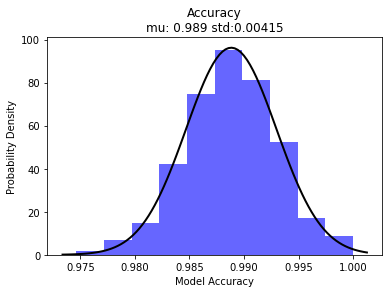

In [21]:
from random import randint, uniform

NUM_ITERATIONS = 1000

for ctr in range(NUM_ITERATIONS):
    # pick random hyperparameters
    hp = {
        'splitsize': uniform(0.2, 0.3),
        'rs': randint(1, 5000),  # random state of train-test split
    }

    # split data and target into train and test
    train_data, test_data, train_con, test_con = train_test_split(scaled, consume, test_size=hp['splitsize'], random_state = hp['rs'])  # 30% training

    # train model
    clf = svm.SVC(kernel='sigmoid')
    clf.fit(train_data, train_con)

    # prediction & evaluation
    y_pred = clf.predict(test_data)
    accuracy, precision, recall = metrics.accuracy_score(test_con, y_pred), metrics.precision_score(test_con, y_pred), metrics.recall_score(test_con, y_pred)
    
    if (not (ctr % 10) and ctr > 0): print(f'Went through {ctr} iterations.')
    d = hp
    d['accuracy'] = accuracy
    d['precision'] = precision
    d['recall'] = recall
    model_acc.at[str(ctr), :] = d

from scipy.stats import norm
import numpy as np

model_acc = model_acc.astype({"accuracy": float, "precision": float, "recall": float})

ac = model_acc['accuracy']

mu, std = norm.fit(ac) 
plt.hist(ac, bins=10, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Accuracy\nmu: {:.3f} std:{:.5f}".format(mu, std)
plt.title(title)
plt.xlabel("Model Accuracy") 
plt.ylabel("Probability Density")
plt.show()


Visualised in the above graph is the quality of the sigmoid SVM model after 1000 iterations.

The quality of the prediction model is validated, as the accuracy after using the model with random and shuffled splits remains at an average of `99%` with a low `0.004` standard deviation.

With our model validated, we can conclude our predective analysis.